In [13]:
from discovery_utils import PROJECT_DIR
import pandas as pd
from discovery_utils.enrichment.crunchbase import (
    enrich_funding_rounds,
    enrich_organisations,
)
from discovery_utils.enrichment import crunchbase
import importlib

importlib.reload(crunchbase);


In [2]:
DATA_DIR = PROJECT_DIR / "src/enrichment"
organisations = pd.read_parquet(DATA_DIR / "organizations.parquet")
funding_rounds = pd.read_parquet(DATA_DIR / "funding_rounds.parquet")
investments = pd.read_parquet(DATA_DIR / "investments.parquet")
investors = pd.read_parquet(DATA_DIR / "investors.parquet")
organisation_descriptions = pd.read_parquet(DATA_DIR / "organization_descriptions.parquet")

In [3]:
# Testing
organisation_ids = organisations.sample(10000).id.unique()

In [193]:
funding_rounds_enriched = crunchbase.enrich_funding_rounds(
        funding_rounds,
        investments,
        investors,
    )


In [196]:
organisations_enriched = crunchbase.enrich_organisations(
        organisations,
        funding_rounds_enriched,
        organisation_descriptions,
        # organisation_ids=organisation_ids,
        enrich_labels = True,
    )

<Axes: >

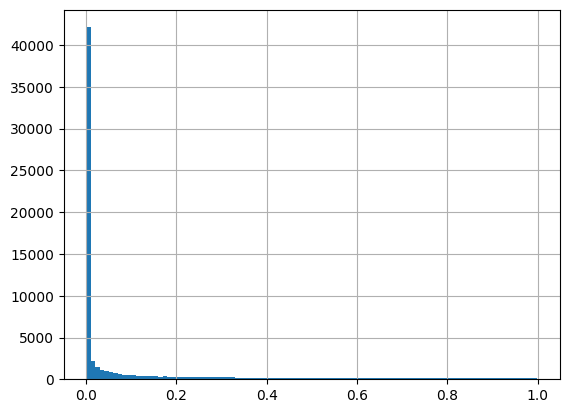

In [197]:
# histogram of investment opportunities
organisations_enriched.query("investment_opp_metric<1").investment_opp_metric.hist(bins=100)